# Taller número 1: Aprendizaje de máquina MISC 2015

## Presentado por: Juan David Gil Lopez y Juan Sebastián Silva Lopez

### Primer punto

En este primer punto se nos entregaba un vector de medias $\boldsymbol{\mu}$ y una matriz de covarianzas $\Sigma$. Inicialmente era necesario desarrollar una gráfica de una distribución gaussiana multivariada dados los parámetros anteriormente mencionados. Para el caso;

\begin{equation}
    \boldsymbol{\mu} = \begin{bmatrix}
      0 \\
      0      
    \end{bmatrix}
    , \Sigma = \begin{bmatrix}
      0.5 & 0.25 \\
      0.25 & 1  
     \end{bmatrix}
\end{equation}


Para poder desarrollar la gráfica requerida fue necesario(dada nuestra metodología) generar muestras aleatorias de la dsitribución normal con los parámetros dados, en ese sentido y por medio de la ayuda de la librería numpy se logro esto de la siguiente manera:

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from pylab import *
from matplotlib import cm
%matplotlib inline

mean = np.matrix('0;0')
mean_array = np.array((0.0,0.0))
covariance = np.matrix('0.5 0.25; 0.25 1.0')
pi = np.pi
x = np.random.multivariate_normal(mean_array,covariance,10000)
print x

[[-0.29545993 -0.16322902]
 [-1.03626035 -2.09972758]
 [-0.61359272 -1.34366723]
 ..., 
 [ 0.58007005  0.87427158]
 [-0.31102988  0.22406651]
 [ 1.2310188  -0.39459682]]


Se generaron entonces 10000 muestras para este caso. Luego se procedió a evaluar cada una de las muestras en la función de distribución normal multivariada dada por:
\begin{equation}
    \frac{1}{2\pi} \frac{1}{|\Sigma|^{1/2}} exp\bigg\{-\frac{1}{2}(\boldsymbol{x - \mu})(\boldsymbol{x - \mu})^T \bigg\}
\end{equation}

que se calculo de la siguiente manera:

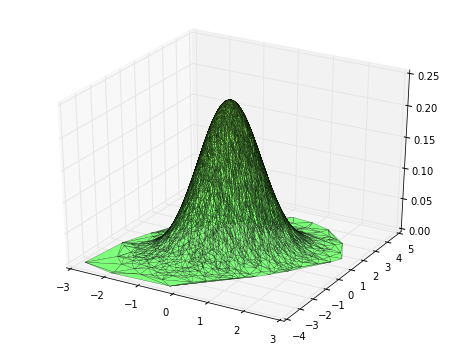

In [39]:
x3 = np.zeros(len(x))
def gaussian_eval(x):
    cov_det = np.linalg.det(covariance)
    tmp = (1.0 / (2.0 * pi))  * (1.0 / math.sqrt(cov_det))
    #print x, np.array(mean_array)
    tmp2 = np.matrix(x - np.array(mean_array))
    tmp3 = (-1.0 / 2.0) * (tmp2*np.linalg.inv(covariance)*np.transpose(tmp2))
    ret = tmp*math.exp(tmp3)
    return ret

def generate_data():
    for i in range(0,len(x)):
        x3[i] = gaussian_eval(x[i])

generate_data()
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(x[0:,0], x[0:,1], x3, cmap=cm.jet, linewidth=0.2, vmin = -4.0, vmax = 4.0)

Se obtuvo la gráfica anterior, que corresponde a la forma que debería de tener una función de distribución normal, como la que usamos para generar las muestras.

### Segundo punto

En el segundo punto se daban dos estimadores de $\boldsymbol{\hat{\mu}}$  y para $\boldsymbol{\hat{\Sigma}}$ , los cuáles fueron calculados por medio del método de máxima verosimilitud. para el estimador de la media se desarrolló la siguiente rutina:

In [43]:
def mean_estim():
    msum = np.array((0.0,0.0));
    for i in range(0,len(x)):
        msum += x[i]
    return msum/len(x)
mean_hat = mean_estim()
print 'Estimated mean: ', mean_hat

Estimated mean:  [ 0.002027   -0.00120826]


que simplemente como puede verse es simplemente calcular el promedio de las muestra que obtuvimos anteriormente. Por medio de este estimador se obtuvo que $\boldsymbol{\hat{\mu}}$  es igual al valor inmediatamente anterior.

Para el estimador de la covarianza se tiene la siguiente rutina:

In [44]:
def cov_estim(mean_estim):
    msum = np.matrix('0.0 0.0; 0.0 0.0')
    for i in range(0,len(x)):
        tmp_x = np.transpose(np.matrix(x[i]))
        tmp_mean = np.transpose(np.matrix(mean_estim))
        tmp1 = (tmp_x - tmp_mean)
        tmp_mat = tmp1 * np.transpose(tmp1)
        msum = msum + tmp_mat
    return msum/len(x)
cov_hat = cov_estim(mean_hat)
print 'Estimated covariance: ', cov_hat

Estimated covariance:  [[ 0.49234467  0.24796726]
 [ 0.24796726  1.00690223]]


Y el valor obtenido para la matriz de covarianza estimada $\boldsymbol{\hat{\Sigma}}$  se puede ver en el resultado inmediatamente anterior. Podemos ver las diferencias absolutas con respecto a los valores inicialmente dados para la media y la covarianza, con el fin de analizar que tan aproximada fue la estimación que se desarrolló.

In [52]:
abs(mean_hat - mean_array) # Difference between estimated mean and 'real' mean.

array([ 0.002027  ,  0.00120826])

In [53]:
abs(cov_hat - covariance) # Difference between estimated covariance and real covariance

matrix([[ 0.00765533,  0.00203274],
        [ 0.00203274,  0.00690223]])

Podemos también ver el porcentaje de precisión de la covarianza, para esta sola muestra que se obtuvo de la siguiente manera.

In [54]:
cov_prec = cov_hat
cov_prec[0,0] = (cov_prec[0,0]*100)/covariance[0,0]
cov_prec[0,1] = (cov_prec[0,1]*100)/covariance[0,1]
cov_prec[1,0] = (cov_prec[1,0]*100)/covariance[1,0]
cov_prec[1,1] = (cov_prec[1,1]*100)/covariance[1,1]
cov_prec

matrix([[  98.46893412,   99.18690467],
        [  99.18690467,  100.69022322]])

En la matriz anterior se puede ver el porcentaje de precisión para esta sola muestra con respecto a los valores reales de media y covarianza. Se podría concluir que el estimador usado tanto para la media y la varianza es bastante preciso. También se trato de desarrollar una prueba con más de diez mil muestras llegando incluso a diez millones de muestras para mejorar la precisión obtenida para estimación de la media y la covarianza, pero los resultados no variaban mucho con respecto a la prueba reportada aquí que corresponde a diez mil muestras. Esto tal vez pueda estar relacionado con la manera en la que se generaron las muestras, así como también puede estar relacionado con la efectividad del estimador como tal.